In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
def load_data(digits_file, labels_file=None):
    # Load the files
    digits = np.loadtxt(digits_file).astype(np.float32)
    if labels_file:
        labels = np.loadtxt(labels_file).astype(int)
        return digits, labels
    return digits

X_train, Y_train = load_data('train35.digits', 'train35.labels')
X_test = load_data('test35.digits')


In [3]:
def Batch_perceptron_train(X, y, epochs=1):
    """
    Train a perceptron model using batch updates.
    
    Args:
    X (np.array): Input feature matrix where each row represents a data point.
    y (np.array): Output label vector where each element is the label for corresponding data point.
    epochs (int): Number of times the training data is processed.

    Returns:
    np.array: Final weights after training.
    float: Final bias value after training.
    list: List of cumulative mistakes over all epochs.
    list: List of Number of mistakes made in each epoch.
    """
    n_samples, n_features = X.shape # Access the number of data points and the number of dimensions
    weights = np.zeros(n_features) # Initialize weights as zeros
    bias = 0 # Initialize bias as zero
    cumulative_mistakes = [] # List to store the cumulative number of mistakes
    total_mistakes = 0 # Total number of mistakes made across all epochs
    mistakes_per_epoch = [] # List to store the number of mistakes per epoch
    
    # Iterate over the number of epochs 
    for epoch in range(epochs):
        mistakes = 0 #Reset mistakes for this epoch
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if np.sign(prediction) != np.sign(y[i]):
                weights += y[i] * X[i]
                bias += y[i]
                mistakes += 1
                total_mistakes += 1
            # Record the total mistakes made after k examples
            cumulative_mistakes.append(total_mistakes)
            
        # Record the number of mistakes made this epoch
        mistakes_per_epoch.append(mistakes)

    return weights, bias, cumulative_mistakes,mistakes_per_epoch

def cross_validate(X, y, k_fold_num=5, max_epochs=10):
    """
    Perform k-fold cross-validation to determine the optimal number of training epochs.

    Args:
    X (np.array): Input feature matrix.
    y (np.array): Output label vector.
    k_fold_num (int): Number of folds for cross-validation.
    max_epochs (int): Maximum number of epochs to test.

    Returns:
    int: The best epoch number found during cross-validation.
    np.array: Array of average accuracies for each epoch.
    int: Number of training samples in each fold.
    """
    
    kf = KFold(n_splits=k_fold_num)
    epoch_performance = np.zeros(max_epochs) # Array to store the performance per epoch

    # Iterate over each split
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Test each epoch count from 1 to maximal epochs
        for epoch in range(1, max_epochs + 1):
            weights, bias, _ ,_ = Batch_perceptron_train(X_train, y_train, epochs=epoch)
            predictions = np.sign(X_test.dot(weights) + bias)
            accuracy = np.mean(predictions == y_test)
            epoch_performance[epoch-1] += accuracy
            
    # Calculate average performance over all k-folds
    epoch_performance /= k_fold_num
    best_epoch = np.argmax(epoch_performance) + 1
    n_train=len(X_train)
    return best_epoch, epoch_performance,n_train

def plot_cumulative_mistakes(mistakes):
    """
    Plot the cumulative number of mistakes over training.

    Args:
    mistakes (list): Cumulative mistakes counted during training.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(mistakes, marker='o')
    plt.title("Cumulative Number of Mistakes Over Training")
    plt.xlabel("Number of Examples Seen")
    plt.ylabel("Cumulative Mistakes")
    plt.grid(True)
    plt.show()


In [4]:
def plot_mistakes_per_epoch(mistakes_per_epoch, n_samples, n_epoch):
    """
    Plots the frequency of mistakes made per epoch during training.
    """
    
    # Calculate the frequency of mistakes (mistakes per data point)
    mistake_freq = np.array(mistakes_per_epoch) / n_samples
    
    # Create the epochs array (starting from 1 to n_epoch)
    epochs = np.arange(1, n_epoch + 1)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, mistake_freq, marker='o', linestyle='-', color='b')
    plt.title("Frequency of Mistakes Per Epoch at the Best Epoch")
    plt.xlabel("Epoch(Number of Feeding Test)")
    plt.ylabel("Frequency of Mistakes")
    plt.grid(True)
    plt.show()



Best number of epochs: 6


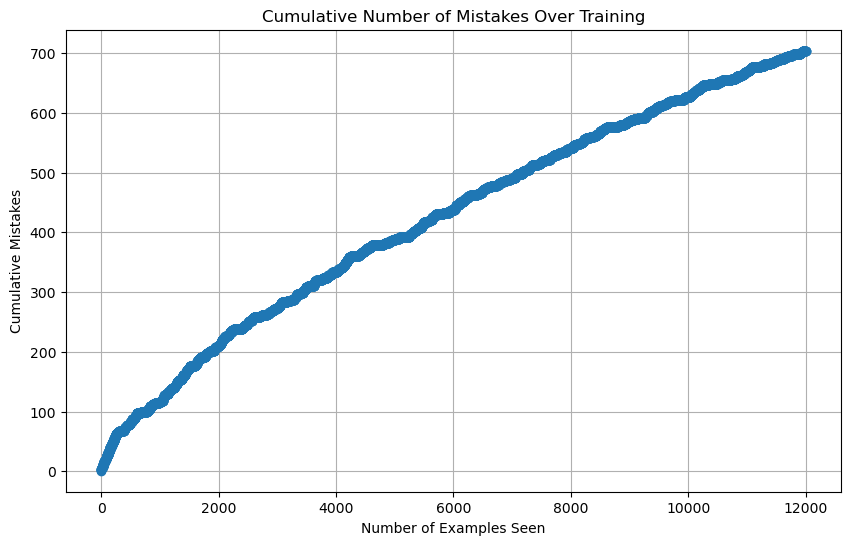

In [5]:
 # Main Execution
if __name__ == "__main__":
    # Determine the best number of epochs via cross-validation
    best_epoch, performance,n_train = cross_validate(X_train, Y_train)
    print("Best number of epochs:", best_epoch)

    # Train with the best number of epochs
    weights, bias, cul_mistakes ,mistakes_per_epoch = Batch_perceptron_train(X_train, Y_train, epochs=best_epoch)

    # Plot cumulative mistakes
    plot_cumulative_mistakes(cul_mistakes)

    # Generate predictions for the test set
    predictions = np.sign(X_test.dot(weights) + bias)
    np.savetxt('test35.predictions', predictions, fmt='%d')

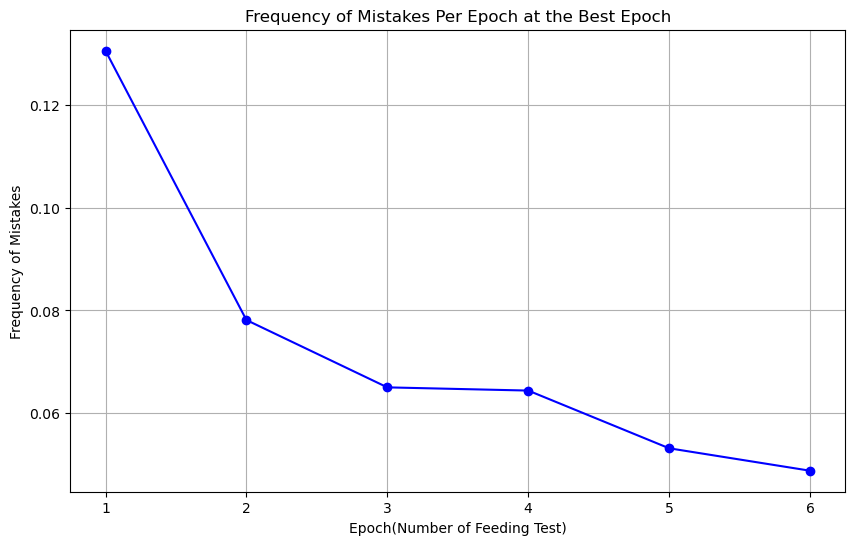

In [6]:
plot_mistakes_per_epoch(mistakes_per_epoch, n_train, best_epoch)

In [7]:
print (predictions)

[-1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.
 -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.
  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1.
 -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.
 -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.
 -1. -1.]


In [11]:
count=0
for i in range(len(predictions)):
    if predictions[i]<0:
        count+=1
print("The number of 3 in the test set:" ,len(predictions)-count)
print("The number of 5 in the test set:", count)

The number of 3 in the test set: 102
The number of 5 in the test set: 98
